In [1]:
#importing libraries as per requirenments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file in df variable & printing out first 10 rows using head method

df=pd.read_csv("C:/Users/Yash Vardhan/Downloads/insurance.csv")
df.head(10)
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [3]:
#one hot encoding

tem=pd.get_dummies(df["region"])
tem.head(10)


,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [4]:
#to remove region column from main table

df.drop("region", axis=1, inplace=True)
df.head(10)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
5,31,female,25.740,0,no,3756.62160
6,46,female,33.440,1,no,8240.58960
7,37,female,27.740,3,no,7281.50560
8,37,male,29.830,2,no,6406.41070
9,60,female,25.840,0,no,28923.13692


In [5]:
#combining both data frames

df=pd.concat([df,tem],axis=1)
df.head(10)


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
5,31,female,25.740,0,no,3756.62160,0,0,1,0
6,46,female,33.440,1,no,8240.58960,0,0,1,0
7,37,female,27.740,3,no,7281.50560,0,1,0,0
8,37,male,29.830,2,no,6406.41070,1,0,0,0
9,60,female,25.840,0,no,28923.13692,0,1,0,0


In [6]:
#converting categorical variables to numeric using map

map={"yes":1, "no":0}
df["smoker"]=df["smoker"].map(map)
map1={"female":0,"male":1}
df["sex"]=df["sex"].map(map1)
df.head(10)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [7]:
#to check the corelation of data frame
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

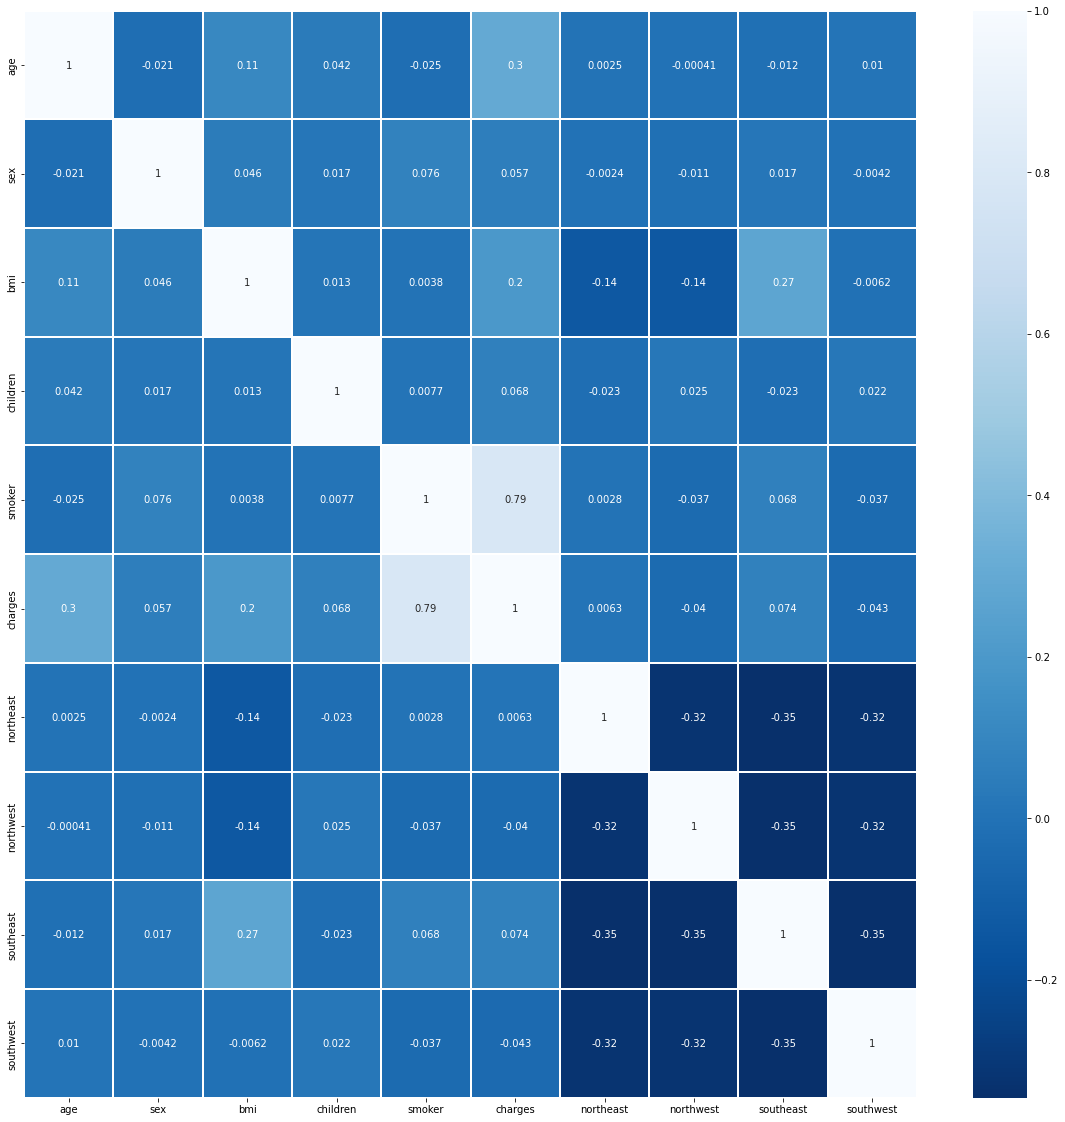

In [29]:
#correlation heatmap to find out highly coorelated columns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r',linewidths=2)

Text(0, 0.5, 'Charges')

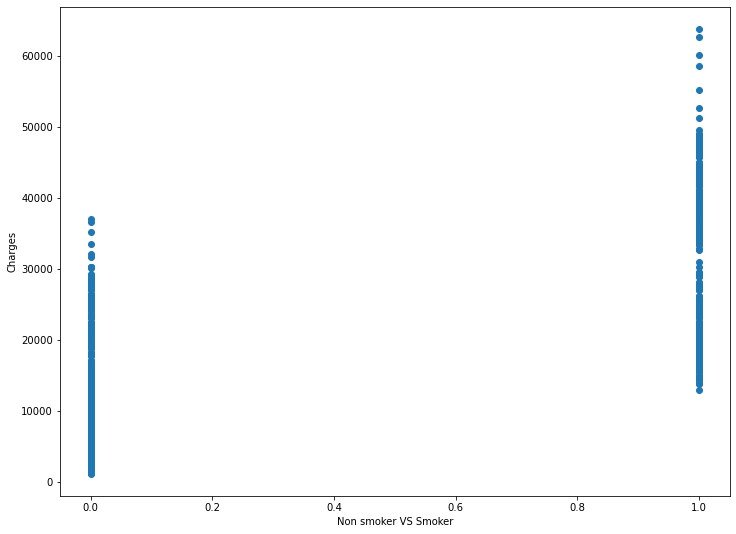

In [9]:
#scatter plot of target based on smoker

x=df["smoker"]
y=df["charges"]
plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.xlabel("Non smoker VS Smoker")
plt.ylabel("Charges")

In [10]:
#defining variables 

Y=df["charges"]
X=df.drop("charges", axis=1)

print(X)
print(Y)

      age  sex     bmi  children  smoker  northeast  northwest  southeast  \
0      19    0  27.900         0       1          0          0          0   
1      18    1  33.770         1       0          0          0          1   
2      28    1  33.000         3       0          0          0          1   
3      33    1  22.705         0       0          0          1          0   
4      32    1  28.880         0       0          0          1          0   
...   ...  ...     ...       ...     ...        ...        ...        ...   
1333   50    1  30.970         3       0          0          1          0   
1334   18    0  31.920         0       0          1          0          0   
1335   18    0  36.850         0       0          0          0          1   
1336   21    0  25.800         0       0          0          0          0   
1337   61    0  29.070         0       1          0          1          0   

      southwest  
0             1  
1             0  
2             0  
3  

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#splitting the data into 85% or training and 15% for testing

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=1,test_size=0.15)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Training a multiple linear regrassion model

reg=LinearRegression().fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
#checking the R squared error on test data

r2_score(Y_test,Y_pred)

0.7444438290908182

In [17]:
#storing indipendent features in a temporary variable
p_x=X

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#changing the data to a 3 degree polynomial

pol= PolynomialFeatures (degree=3)
p_x=pol.fit_transform(X)
print(p_x)

[[ 1. 19.  0. ...  0.  0.  1.]
 [ 1. 18.  1. ...  0.  0.  0.]
 [ 1. 28.  1. ...  0.  0.  0.]
 ...
 [ 1. 18.  0. ...  0.  0.  0.]
 [ 1. 21.  0. ...  0.  0.  1.]
 [ 1. 61.  0. ...  0.  0.  0.]]


In [21]:
#training the model similarly but with 3rd degree polynomial of X this time

X_train,X_test,Y_train,Y_test= train_test_split(p_x,Y,random_state=1,test_size=0.15)
reg=LinearRegression().fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
r2_score(Y_test,Y_pred)

0.8421061240331089

In [22]:
#cross validating the score to check & avoid overfitting

from sklearn.model_selection import cross_val_score
c=cross_val_score(reg,p_x,Y,cv=4)

In [23]:
#final mean accuracy

print("Mean accuracy after cross_validation is :- " , c.mean()*100, end="%")

Mean accuracy after cross_validation is :-  82.66748374845909%

# conclusion :- we have successfully identified the pattern in the data and the 3rd degree polynomial regression has given a good accuracy of 82% on cross validation.